In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import seaborn as sns

In [2]:
df=pd.read_csv(r"G:\ML projects\EmailSpam.csv")

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [6]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
df.duplicated().sum()

415

In [8]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(5157, 2)

### Preprocessing

In [10]:
words=[]

for i in df["Message"]:
    i=i.lower()
    i=re.sub("[^a-z0-9 ]","",i) #removing everything except space and a-z
    words.append(i)

In [11]:
df["message"]=words

In [12]:
df.head()

,Category,Message,message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [13]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [14]:
df.head()

,Category,Message,message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


ham --> 0 
spam-->1

In [15]:
tfv=TfidfVectorizer()

### Splitting X and Y

In [16]:
x=tfv.fit_transform(df["message"]).toarray() #need to convert it to numpy array
y=df['Category']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75)

## Building neural network

In [19]:
nn=Sequential()

#1st hidden layer
nn.add(Dense(128,input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#2nd hidden layer
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#3rd hidden layer
nn.add(Dense(32,activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#o/p layer
nn.add(Dense(1,activation='sigmoid'))

In [20]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1221120   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [21]:
early_stop=EarlyStopping(monitor='val_loss',patience=10)

In [22]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
hist=nn.fit(xtrain,ytrain,callbacks=early_stop,epochs=100,validation_split=0.2,batch_size=10)

Epoch 1/100
310/310 [==============================] - 8s 22ms/step - loss: 0.5280 - accuracy: 0.7407 - val_loss: 0.3735 - val_accuracy: 0.8579
Epoch 2/100
310/310 [==============================] - 6s 18ms/step - loss: 0.2488 - accuracy: 0.9059 - val_loss: 0.1465 - val_accuracy: 0.9509
Epoch 3/100
310/310 [==============================] - 6s 18ms/step - loss: 0.1570 - accuracy: 0.9463 - val_loss: 0.1320 - val_accuracy: 0.9599
Epoch 4/100
310/310 [==============================] - 6s 18ms/step - loss: 0.1098 - accuracy: 0.9606 - val_loss: 0.1337 - val_accuracy: 0.9638
Epoch 5/100
310/310 [==============================] - 6s 18ms/step - loss: 0.0916 - accuracy: 0.9715 - val_loss: 0.1564 - val_accuracy: 0.9561
Epoch 6/100
310/310 [==============================] - 6s 18ms/step - loss: 0.0686 - accuracy: 0.9748 - val_loss: 0.1511 - val_accuracy: 0.9664
Epoch 7/100
310/310 [==============================] - 6s 18ms/step - loss: 0.0645 - accuracy: 0.9780 - val_loss: 0.1710 - val_accuracy:

In [24]:
nn.evaluate(xtrain,ytrain)

121/121 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9925


[0.044792935252189636, 0.9925006628036499]

In [25]:
nn.evaluate(xtest,ytest)

41/41 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.9682


[0.18012185394763947, 0.9682170748710632]

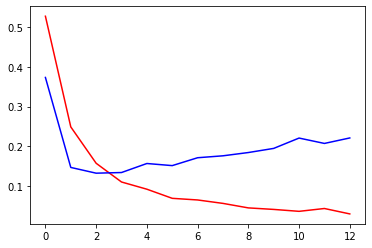

In [26]:
plt.plot(hist.history['loss'],c='red')
plt.plot(hist.history['val_loss'],c='blue')

In [27]:
y_pred_prob=nn.predict(xtest) #return probability
y_pred=[]

for i in y_pred_prob:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

41/41 [==============================] - 0s 2ms/step


In [28]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1140
           1       1.00      0.73      0.84       150

    accuracy                           0.97      1290
   macro avg       0.98      0.86      0.91      1290
weighted avg       0.97      0.97      0.97      1290



<AxesSubplot:>

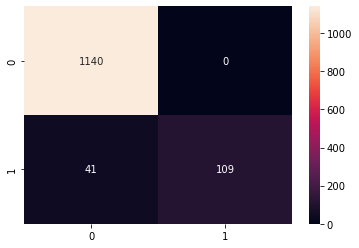

In [29]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

In [30]:
nn.save("email_detection.h5") # saving model for future use

### Testing model on real world data

In [31]:
def detect(model,string):
    string=string.lower()
    string=re.sub("[^a-z ]","",string)
    x=tfv.transform([string]).toarray()
    y=model.predict(x)
    print(y)
    if y>=0.5:
        print("This is spam mail")
    else:
        print("This is ham mail")
        
email_model=load_model("email_detection.h5")  

In [32]:
message="How to win cash price!! click on below link and redeem it."

In [33]:
detect(email_model,message)

1/1 [==============================] - 0s 75ms/step
[[0.84257233]]
This is spam mail


In [34]:
message='Congratulation!!!! You won a prize of $10000.'

In [35]:
detect(email_model,message)

1/1 [==============================] - 0s 14ms/step
[[0.85261047]]
This is spam mail


In [36]:
message="Need last month reports"

In [37]:
detect(email_model,message)

1/1 [==============================] - 0s 15ms/step
[[2.8090767e-06]]
This is ham mail
